In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [2]:
df = pd.read_csv('tarifas_direto.csv')
df['%TUSD'] = df['Total TUSD'] / (df['Total TE'] + df['Total TUSD'])

In [3]:
#Considerando todas as tarifas B1 Convencional Residencial
#ranking de concessionarias com maior porcentagem de TUSD
df_interesse = df[(df['SUBGRUPO'] == 'B1') & (df['MODALIDADE'] == 'Convencional')
& (df['SUBCLASSE'] == 'Residencial')]
df_interesse

,CONCESSIONARIA,SUBGRUPO,MODALIDADE,CLASSE,SUBCLASSE,POSTO,UNIDADE,Total TUSD,Total TE,%TUSD
30,AME,B1,Convencional,Residencial,Residencial,Não se aplica,MWh,546.81,288.04,0.654980
77,Boa Vista,B1,Convencional,Residencial,Residencial,Não se aplica,MWh,398.95,336.18,0.542693
123,CASTRO - DIS,B1,Convencional,Residencial,Residencial,Não se aplica,MWh,264.67,201.63,0.567596
196,CEA,B1,Convencional,Residencial,Residencial,Não se aplica,MWh,497.19,224.48,0.688944
287,CEB,B1,Convencional,Residencial,Residencial,Não se aplica,MWh,345.68,353.03,0.494740
...,...,...,...,...,...,...,...,...,...,...
6406,HIDROPAN,B1,Convencional,Residencial,Residencial,Não se aplica,MWh,313.91,248.90,0.557755
6504,LIGHT,B1,Convencional,Residencial,Residencial,Não se aplica,MWh,447.38,354.82,0.557691
6551,MUXENERGIA,B1,Convencional,Residencial,Residencial,Não se aplica,MWh,376.13,227.55,0.623062
6609,SULGIPE,B1,Convencional,Residencial,Residencial,Não se aplica,MWh,421.64,220.05,0.657077


([0, 1, 2, 3, 4],
 [Text(0, 0, 'CERPALO'),
  Text(1, 0, 'CERIS'),
  Text(2, 0, 'CERTREL'),
  Text(3, 0, 'CERES'),
  Text(4, 0, 'CERMOFUL')])

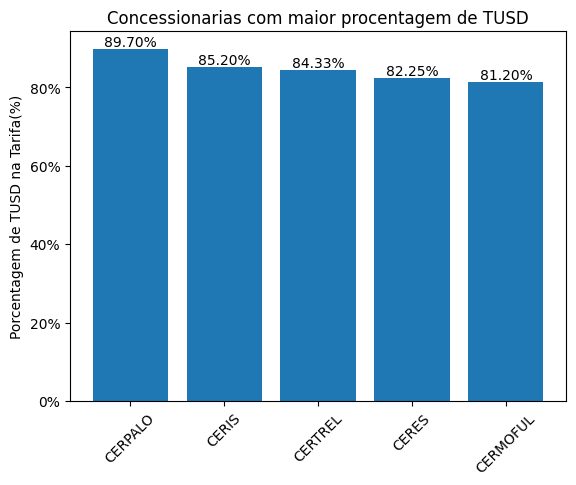

In [32]:
#Seleciona as 5 concessionarias com maior porcentagem de TUSD
#Seleciona com base no filtro anterior
n_maiores = df_interesse.nlargest(5, '%TUSD')
n_menores = df_interesse.nsmallest(5, '%TUSD')

fig, ax = plt.subplots()
bar_container = ax.bar(n_maiores['CONCESSIONARIA'], n_maiores['%TUSD'])
ax.set(ylabel='Porcentagem de TUSD na Tarifa(%)', title='Concessionarias com maior procentagem de TUSD')
ax.bar_label(bar_container, fmt='{:.2%}')
#Format as percent
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.xticks(rotation = 45)

In [33]:
df.head()

,CONCESSIONARIA,SUBGRUPO,MODALIDADE,CLASSE,SUBCLASSE,POSTO,UNIDADE,Total TUSD,Total TE,%TUSD
0,AME,A3,Azul,Não se aplica,Não se aplica,Ponta,MWh,31.69,0.00,1.000000
1,AME,A3,Azul,Não se aplica,Não se aplica,Ponta,kW,8.74,0.00,1.000000
2,AME,A3,Azul,Não se aplica,Não se aplica,Fora ponta,MWh,31.69,0.00,1.000000
3,AME,A3,Azul,Não se aplica,Não se aplica,Fora ponta,kW,7.12,0.00,1.000000
4,AME,A3,Azul,Não se aplica,Não se aplica,Ponta,MWh,84.42,456.17,0.156163


In [54]:
posto = ['Ponta', 'Fora ponta']
df2 = df[(df['UNIDADE'] == 'MWh') & (df['POSTO'].isin(['Ponta', 'Fora ponta']))
         & (df['MODALIDADE'].isin(['Azul', 'Verde']))]

df2.head(10)

,CONCESSIONARIA,SUBGRUPO,MODALIDADE,CLASSE,SUBCLASSE,POSTO,UNIDADE,Total TUSD,Total TE,%TUSD
0,AME,A3,Azul,Não se aplica,Não se aplica,Ponta,MWh,31.69,0.00,1.000000
2,AME,A3,Azul,Não se aplica,Não se aplica,Fora ponta,MWh,31.69,0.00,1.000000
4,AME,A3,Azul,Não se aplica,Não se aplica,Ponta,MWh,84.42,456.17,0.156163
6,AME,A3,Azul,Não se aplica,Não se aplica,Fora ponta,MWh,84.42,272.76,0.236351
9,AME,A4,Azul,Não se aplica,Não se aplica,Ponta,MWh,117.07,0.00,1.000000
11,AME,A4,Azul,Não se aplica,Não se aplica,Fora ponta,MWh,117.07,0.00,1.000000
13,AME,A4,Azul,Não se aplica,Não se aplica,Ponta,MWh,182.53,456.17,0.285784
15,AME,A4,Azul,Não se aplica,Não se aplica,Fora ponta,MWh,182.53,272.76,0.400909
18,AME,A4,Verde,Não se aplica,Não se aplica,Ponta,MWh,1640.31,0.00,1.000000
20,AME,A4,Verde,Não se aplica,Não se aplica,Fora ponta,MWh,117.07,0.00,1.000000


# Dimensionamento Grupo A

In [79]:
concessionaria = 'AME'
subgrupo = 'A4'
modalidade = 'Azul'
posto_fp = 'Fora ponta'
posto_p = 'Ponta'


#Fator de Ajuste (TEFP(Tarifa Energia Fora Ponta) / TEP(Tarifa Energia Ponta))
teForaPonta = df[(df['CONCESSIONARIA'] == concessionaria) &
                 (df['SUBGRUPO'] == subgrupo) &
                 (df['MODALIDADE'] == modalidade) &
                 (df['Total TE'] > 0) &
                 (df['POSTO'] == posto_fp)]['Total TE'].iloc[0]
tePonta = df[(df['CONCESSIONARIA'] == concessionaria) &
             (df['SUBGRUPO'] == subgrupo) &
             (df['MODALIDADE'] == modalidade) &
             (df['Total TE'] > 0) &
             (df['POSTO'] == posto_p)]['Total TE'].iloc[0]

fAjuste = teForaPonta / tePonta

0.5979349803801214

In [106]:
concessionarias = df['CONCESSIONARIA'].unique()
subgrupos = ['A1', 'A2', 'A3', 'A3a', 'A4', 'AS']
modalidades = ['Azul', 'Verde']

df_fAjuste = pd.DataFrame(columns=['CONCESSIONARIA', 'SUBGRUPO', 'MODALIDADE', 
                                   'TE FORA PONTA', 'TE PONTA','FATOR AJUSTE'])

for concessionaria in concessionarias:
    for subgrupo in subgrupos:
        for modalidade in modalidades:
            try:
                teForaPonta = df[(df['CONCESSIONARIA'] == concessionaria) &
                     (df['SUBGRUPO'] == subgrupo) &
                     (df['MODALIDADE'] == modalidade) &
                     (df['Total TE'] > 0) &
                     (df['POSTO'] == 'Fora ponta')]['Total TE'].iloc[0]
                tePonta = df[(df['CONCESSIONARIA'] == concessionaria) &
                             (df['SUBGRUPO'] == subgrupo) &
                             (df['MODALIDADE'] == modalidade) &
                             (df['Total TE'] > 0) &
                             (df['POSTO'] == 'Ponta')]['Total TE'].iloc[0]
                fAjuste = teForaPonta / tePonta
                
                
                entry = pd.DataFrame.from_dict({
                    'CONCESSIONARIA': [concessionaria],
                    'SUBGRUPO': [subgrupo],
                    'MODALIDADE': [modalidade],
                    'TE FORA PONTA': [teForaPonta],
                    'TE PONTA': [tePonta],
                    'FATOR AJUSTE': [fAjuste]
                })
                df_fAjuste = pd.concat([df_fAjuste, entry], ignore_index=True)
            except:
                continue


In [113]:
df_fAjuste.to_csv('fatorAjuste.csv')

In [107]:
df_fAjuste

,CONCESSIONARIA,SUBGRUPO,MODALIDADE,TE FORA PONTA,TE PONTA,FATOR AJUSTE
0,AME,A3,Azul,272.76,456.17,0.597935
1,AME,A4,Azul,272.76,456.17,0.597935
2,AME,A4,Verde,272.76,456.17,0.597935
3,Boa Vista,A4,Azul,317.39,542.84,0.584684
4,Boa Vista,A4,Verde,317.39,542.84,0.584684
...,...,...,...,...,...,...
302,SULGIPE,A3,Azul,209.23,339.05,0.617107
303,SULGIPE,A4,Azul,209.23,339.05,0.617107
304,SULGIPE,A4,Verde,209.23,339.05,0.617107
305,UHENPAL,A4,Azul,195.90,311.41,0.629074


### Energia Gerada Fora Ponta para Compensa a Ponta

In [119]:
consumoPonta = 1000
consumoForaPonta = 5000

# Energia Ponta ajustada Fora Ponta
consumoPontaAjustado = consumoPonta / fAjuste
print('Geração para compensar consumo fora Ponta: ', round(consumoPontaAjustado,2))

print('Geração Total Necessária (Fora Ponta + Ponta Ajustado): ', round(consumoPontaAjustado + consumoForaPonta,2))

Geração para compensar consumo fora Ponta:  1589.64
Geração Total Necessária (Fora Ponta + Ponta Ajustado):  6589.64
